In [1]:
!pip install stopwordsiso

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#Import necessary libraries
import pandas as pd
import re
import nltk
nltk.download('punkt')
import numpy as np
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

#Reading the dataset
path='https://raw.githubusercontent.com/AmeeAyco/DARNA/main/Final_DARNA_Dataset.csv'
Dataset=pd.read_csv(path)

#Remove symbols
Dataset['tidy'] = Dataset['Post'].str.replace("[^a-zA-Z#]", " ")
Dataset.head(10)
Dataset['tidy']=Dataset['tidy'].astype(str)
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

#Remove html tags
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext
Dataset['tidy'] = Dataset['tidy'].apply(cleanhtml)

#Remove tagalog stopwords
import stopwordsiso as stopwords
stopwords=stopwords.stopwords("tl")
Dataset['tidy'] = Dataset['tidy'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

#Remove english stopwords
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') 
Dataset['tidy'] = Dataset['tidy'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
Dataset['tidy'] = Dataset['tidy'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Expand english contradictions
contractions_dict = { 'didn\'t': 'did not', 'don\'t': 'do not', "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he had / he would", "he'd've": "he would have", "he'll": "he shall / he will", "he'll've": "he shall have / he will have", "he's": "he has / he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how has / how is / how does", "I'd": "I had / I would", "I'd've": "I would have", "I'll": "I shall / I will", "I'll've": "I shall have / I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had / it would", "it'd've": "it would have", "it'll": "it shall / it will", "it'll've": "it shall have / it will have", "it's": "it has / it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had / she would", "she'd've": "she would have", "she'll": "she shall / she will", "she'll've": "she shall have / she will have", "she's": "she has / she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as / so is", "that'd": "that would / that had", "that'd've": "that would have", "that's": "that has / that is", "there'd": "there had / there would", "there'd've": "there would have", "there's": "there has / there is", "they'd": "they had / they would", "they'd've": "they would have", "they'll": "they shall / they will", "they'll've": "they shall have / they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had / we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what shall / what will", "what'll've": "what shall have / what will have", "what're": "what are", "what's": "what has / what is", "what've": "what have", "when's": "when has / when is", "when've": "when have", "where'd": "where did", "where's": "where has / where is", "where've": "where have", "who'll": "who shall / who will", "who'll've": "who shall have / who will have", "who's": "who has / who is", "who've": "who have", "why's": "why has / why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had / you would", "you'd've": "you would have", "you'll": "you shall / you will", "you'll've": "you shall have / you will have", "you're": "you are", "you've": "you have" } 
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict): 
  def replace(match): 
    return contractions_dict[match.group(0)] 
  return contractions_re.sub(replace, s)
Dataset['tidy'] = Dataset['tidy'].apply(expand_contractions)
Dataset['tidy'] = Dataset['tidy'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#Tokenize
Dataset['token'] = Dataset['tidy'].apply(lambda x: word_tokenize(x))

#Lemmatized
Dataset['lemmatized'] = Dataset['token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Using tensorflow for Neural Network

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import Bidirectional
max_features = 220
tokenizer = Tokenizer(num_words = max_features, split = (' ')) 
tokenizer.fit_on_texts(Dataset['lemmatized'].values)
X = tokenizer.texts_to_sequences(Dataset['lemmatized'].values) # making all the tokens into same sizes using padding. 
X = pad_sequences(X, maxlen = max_features) 
X.shape
Y=Dataset['Risky?']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=42)

In [14]:
# Using matplotlib to plot the accuracy vs epoch
import matplotlib.pyplot as plt

def my_plot(epochs, loss):
    plt.plot(epochs, loss)
    
def train(num_epochs,optimizer,criterion,model):
    loss_vals=  []
    for epoch in range(num_epochs):
        epoch_loss= []
        for i, (images, labels) in enumerate(trainloader):
            # rest of the code
            loss.backward()
            epoch_loss.append(loss.item())
            # rest of the code
        # rest of the code
        loss_vals.append(sum(epoch_loss)/len(epoch_loss))
        # rest of the code
    
    # plotting
    my_plot(np.linspace(1, num_epochs, num_epochs).astype(int), loss_vals)

In [18]:
# Build NN model
model = Sequential()
model.add(Embedding(max_features, 64, input_length = xtrain.shape[1], trainable=False)) 
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Train the model
history=model.fit(xtrain, ytrain,batch_size=64,epochs = 10, validation_data=(xtest, ytest))

Epoch 1/10
3/3 [==============================] - 10s 2s/step - loss: 0.6902 - accuracy: 0.5491 - val_loss: 0.6841 - val_accuracy: 0.5333
Epoch 2/10
3/3 [==============================] - 4s 1s/step - loss: 0.6778 - accuracy: 0.5376 - val_loss: 0.6732 - val_accuracy: 0.5333
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 0.6617 - accuracy: 0.5376 - val_loss: 0.6553 - val_accuracy: 0.5333
Epoch 4/10
3/3 [==============================] - 4s 1s/step - loss: 0.6534 - accuracy: 0.5376 - val_loss: 0.6293 - val_accuracy: 0.6667
Epoch 5/10
3/3 [==============================] - 4s 1s/step - loss: 0.6249 - accuracy: 0.7514 - val_loss: 0.6239 - val_accuracy: 0.9067
Epoch 6/10
3/3 [==============================] - 4s 1s/step - loss: 0.6049 - accuracy: 0.8497 - val_loss: 0.5680 - val_accuracy: 0.7600
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.5479 - accuracy: 0.7861 - val_loss: 0.5112 - val_accuracy: 0.7467
Epoch 8/10
3/3 [========================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


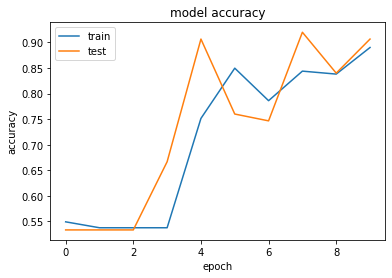

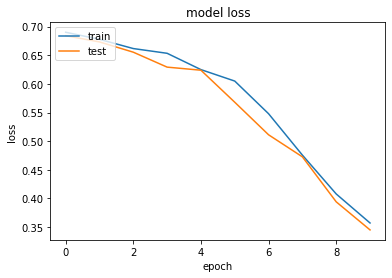

In [20]:
# Plot Model Loss and Model accuracy # list all data in history 
print(history.history.keys()) # summarize history for accuracy 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) # RAISE ERROR 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show() # summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) #RAISE ERROR 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [22]:
print(model.evaluate(xtest, ytest))

3/3 [==============================] - 0s 110ms/step - loss: 0.3451 - accuracy: 0.9067
[0.3451201319694519, 0.9066666960716248]


In [23]:
list=['bound','looking','foryoupage','sana','sinu','hiring','gustong','hire','thankyoulord','awaits']
pat = r'\b(?:{})\b'.format('|'.join(list))
Dataset['new_tidy'] = Dataset['tidy'].str.replace(pat, '')
Dataset.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Post,Risky?,tidy,token,lemmatized,new_tidy
0,Urgent!!!!!!\nWe’re looking for 2 caregiver st...,1,urgent looking caregiver stay clovis californi...,"[urgent, looking, caregiver, stay, clovis, cal...",urgent looking caregiver stay clovis californi...,urgent caregiver stay clovis california fresn...
1,*Looking for Passport Holder bound to Singapor...,1,looking passport holder bound singapore decent...,"[looking, passport, holder, bound, singapore, ...",looking passport holder bound singapore decent...,passport holder singapore decent salary leg...
2,URGENT - URGENT!!!\nBARTENDER\nImmediate Joini...,1,urgent urgent bartender immediate joining loca...,"[urgent, urgent, bartender, immediate, joining...",urgent urgent bartender immediate joining loca...,urgent urgent bartender immediate joining loca...
3,## **Job Opportunity in Australia**\n\nWe are ...,1,opportunity australia market leader bigger sca...,"[opportunity, australia, market, leader, bigge...",opportunity australia market leader bigger sca...,opportunity australia market leader bigger sca...
4,Sino po walang pang gastos dito na gustong mag...,1,sino pang gastos gustong abroad later bound si...,"[sino, pang, gastos, gustong, abroad, later, b...",sino pang gastos gustong abroad later bound si...,sino pang gastos abroad later singapore dome...


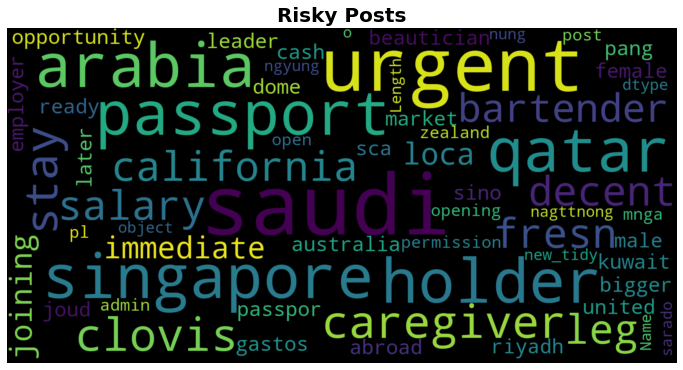

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(Dataset[Dataset['Risky?']==1]['new_tidy']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Risky Posts',fontsize=20,fontweight='bold')
plt.show()